In [20]:
import env
import utilities as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemonade_df = pd.read_csv(env.data_path + "lemonade.csv")

In [11]:
lemonade_df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


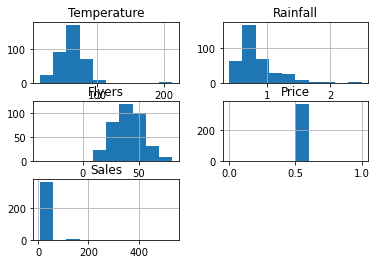

In [18]:
lemonade_df.hist()
plt.show()

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [14]:
numerical_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in numerical_cols:
    upper, lower = utils.generate_outlier_bounds(lemonade_df, col, multiplier=1.5)
    print(f"{col} bounds:  {(lower, upper)}")

Temperature bounds:  (16.700000000000003, 104.7)
Rainfall bounds:  (0.26, 1.3)
Flyers bounds:  (4.0, 76.0)
Price bounds:  (0.5, 0.5)
Sales bounds:  (5.0, 45.0)


Based on the distributions, I don't think that the lower bounds for temperature and rainfall shouldn't be used since those distributions are skewed to the right. The sales lower bound doesn't make sense since it is lower than the minimum amount. The bounds for price shouldn't be used since the price is constant.

* Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

The price upper bound should not be used since price is constant. The temperature upper bound looks good since the max value is 212 and it is far from the 3Q temp of 71. The rainfall upper bound looks good as well since the max value is far from the 3Q value. I don't think the flyers upper bound should be used since it looks like it would remove the normality of the distribution. The sales upper bound looks good as well.

* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [19]:
numerical_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in numerical_cols:
    upper, lower = utils.generate_outlier_bounds(lemonade_df, col, multiplier=3)
    print(f"{col} bounds:  {(lower, upper)}")

Temperature bounds:  (-16.299999999999997, 137.7)
Rainfall bounds:  (-0.13, 1.69)
Flyers bounds:  (-23.0, 103.0)
Price bounds:  (0.5, 0.5)
Sales bounds:  (-10.0, 60.0)


The temperature, rainfall, and sales lower bounds do not make sense since they fall below the minimum values for those columns. The price bounds should not be used again since price is constant. The flyers lower bound seems good since its minimum value is -38, but I don't really understand what a negative flyer is. The temperature, rainfall, and sales upper bounds look good. The flyers upper bound is greater than the max value in that column.

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Temperature, rainfall, and flyers appear normally distributed.

* Use a 2 sigma decision rule to isolate the outliers.

In [21]:
x = lemonade_df['Temperature']

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
temp_outliers = x[zscores.abs() >= 2]
temp_outliers

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [21]:
x = lemonade_df['Temperature']

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
temp_outliers = x[zscores.abs() >= 2]
temp_outliers

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [22]:
x = lemonade_df['Rainfall']

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
rain_outliers = x[zscores.abs() >= 2]
rain_outliers

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [23]:
x = lemonade_df['Flyers']

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
flyer_outliers = x[zscores.abs() >= 2]
flyer_outliers

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

* Do these make sense?

Some of the temperature outliers make sense because I don't think they were selling lemonade in 212 degree weather or in 15 degree weather. I don't understand what negative flyers means. The rainfall outliers don't seem like they should be removed.

* Should certain outliers be kept or removed?

Yes, some of the crazy temperature values and probably the negative flyer value.

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [24]:
def find_outliers_with_sigma(df, cols, sigma):
    outliers_dict = {}
    
    for col in cols:
        x = df[col]

        zscores = pd.Series((x - x.mean()) / x.std())
        flyer_outliers = x[zscores.abs() >= sigma]
        
        outliers_dict[col + "_outliers"] = flyer_outliers
    
    return outliers_dict

In [26]:
outliers = find_outliers_with_sigma(lemonade_df, ['Temperature', 'Rainfall', 'Flyers'], 3)

In [27]:
outliers['Temperature_outliers']

41    212.0
Name: Temperature, dtype: float64

In [28]:
outliers['Rainfall_outliers']

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [29]:
outliers['Flyers_outliers']

324   -38
Name: Flyers, dtype: int64

These outliers make more sense.